<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_8_Machine_Learning_Laborartory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstration of Support Vector Machines (SVMs)
This notebook demonstrates loading the Heart Disease dataset, preprocessing, handling missing values, classification using Support Vector Machines (SVMs), and visualizing decision boundaries on the moons dataset using both linear and non-linear SVMs.

## 1. Load the Heart Disease Dataset

In [ ]:

import pandas as pd

# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
                "slope", "ca", "thal", "target"]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Handle Missing Values and Remove Duplicates

In [ ]:

# Check for missing values (marked by '?')
df.replace('?', pd.NA, inplace=True)

# Convert appropriate columns to numeric
for col in ["ca", "thal"]:
    df[col] = pd.to_numeric(df[col])

# Drop duplicate entries
df.drop_duplicates(inplace=True)

# Handle missing values - removing rows with missing values
df.dropna(inplace=True)  # Alternatively, you could use imputation

# Check dataset info to confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


## 3. One-Hot Encoding and Splitting the Data

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
categorical_features = ["cp", "restecg", "slope", "thal"]
df = pd.get_dummies(df, columns=categorical_features)

# Separate features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split into train (70%), validation (15%), and test (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)


## 4. Plot Class Distribution

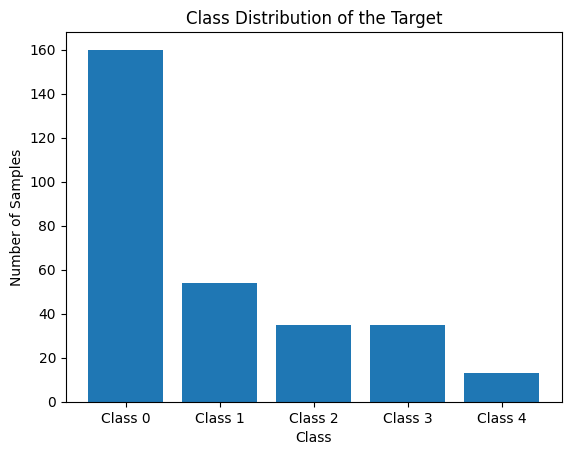

Class 0: 160, Class 1: 54, Class 2: 35, Class 3: 35, Class 4: 13 


In [ ]:

import matplotlib.pyplot as plt

# Plotting the distribution of the classes in the dataset
plt.bar(['Class 0','Class 1','Class 2','Class 3','Class 4'], [len(y[y == 0]), len(y[y == 1]), len(y[y == 2]),len(y[y == 3]),len(y[y==4])])
plt.title('Class Distribution of the Target')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

# Check class distribution ratio
print(f"Class 0: {len(y[y == 0])}, Class 1: {len(y[y == 1])}, Class 2: {len(y[y == 2])}, Class 3: {len(y[y == 3])}, Class 4: {len(y[y == 4])} ")


## 5. Train a Linear Support Vector Classifier

In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize a linear SVM
svm_linear = SVC(kernel='linear', random_state=42)

# Train the model
svm_linear.fit(X_train, y_train)

# Predictions on the test set
y_pred = svm_linear.predict(X_test)

# Evaluate the classifier
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[22  1  0  1  0]
 [ 4  4  0  0  0]
 [ 2  2  1  0  1]
 [ 0  1  2  1  1]
 [ 0  0  0  1  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        24
           1       0.50      0.50      0.50         8
           2       0.33      0.17      0.22         6
           3       0.33      0.20      0.25         5
           4       0.33      0.50      0.40         2

    accuracy                           0.64        45
   macro avg       0.46      0.46      0.44        45
weighted avg       0.60      0.64      0.62        45



## 6. Non-Linear SVM on Moons Dataset

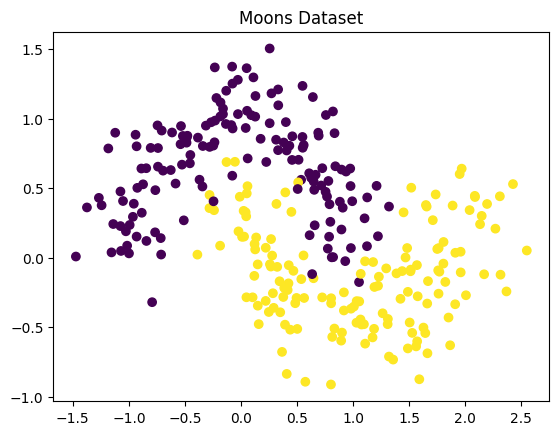

In [ ]:
from sklearn.datasets import make_moons
import numpy as np

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
plt.title('Moons Dataset')
plt.show()

# Split the moons dataset into train and test sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)


## 7. Train Linear and Kernel SVM on Moons Dataset

In [ ]:
# Train a Linear SVM
svm_linear_moons = SVC(kernel='linear', random_state=42)
svm_linear_moons.fit(X_train_moons, y_train_moons)

# Train a Polynomial Kernel SVM (degree 3)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_moons, y_train_moons)

# Train an RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_moons, y_train_moons)


SVC(random_state=42)

## 8. Visualize Decision Boundaries

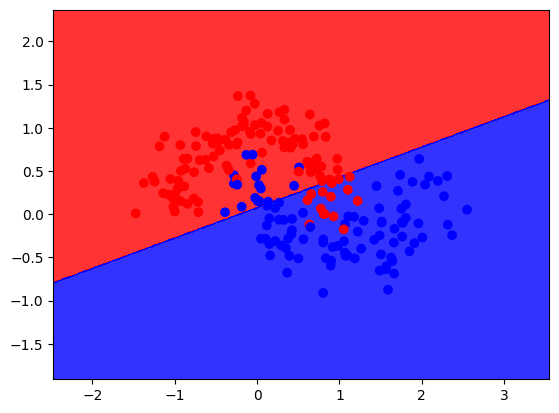

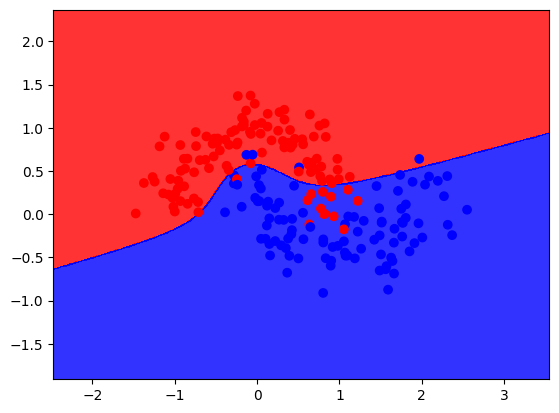

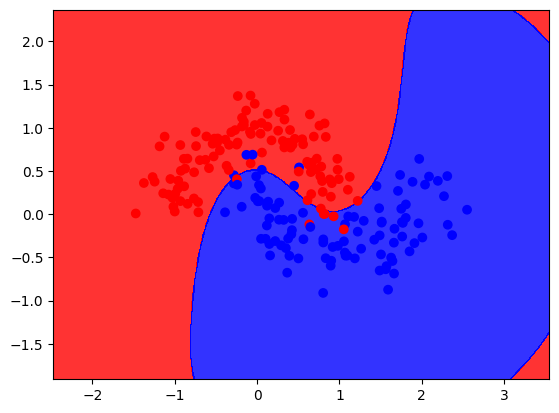

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'blue')))
    plt.show()

# Plot decision boundaries
plot_decision_boundary(svm_linear_moons, X_train_moons, y_train_moons)
plot_decision_boundary(svm_poly, X_train_moons, y_train_moons)
plot_decision_boundary(svm_rbf, X_train_moons, y_train_moons)


## 9. Evaluate and Compare Models

In [ ]:

# Evaluate Linear SVM
y_pred_linear_moons = svm_linear_moons.predict(X_test_moons)
print("Linear SVM Classification Report:\n", classification_report(y_test_moons, y_pred_linear_moons))

# Evaluate Polynomial Kernel SVM
y_pred_poly = svm_poly.predict(X_test_moons)
print("Polynomial Kernel SVM Classification Report:\n", classification_report(y_test_moons, y_pred_poly))

# Evaluate RBF Kernel SVM
y_pred_rbf = svm_rbf.predict(X_test_moons)
print("RBF Kernel SVM Classification Report:\n", classification_report(y_test_moons, y_pred_rbf))


Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88        38
           1       0.91      0.92      0.91        52

    accuracy                           0.90        90
   macro avg       0.90      0.90      0.90        90
weighted avg       0.90      0.90      0.90        90

Polynomial Kernel SVM Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89        38
           1       0.91      0.94      0.92        52

    accuracy                           0.91        90
   macro avg       0.91      0.91      0.91        90
weighted avg       0.91      0.91      0.91        90

RBF Kernel SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.96      0.97        52

    accuracy                           0.97        90
   macro

##**Assignment on Support Vector Machines (SVMs) [20 marks]**

For this assignment, you shall be using UC Irvine's Real Estate Valuation Dataset from [this link](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set). Comparisons will be made between SVMs using the Polynomial and RBF kernels. You are required to carry out the following steps:



1.   Load the online news popularity dataset from the link above. You may use the data import code snippet provided there. **[1 mark]**
2.   Preprocess the dataset to handle duplicates, missing values. Also scale features if necessary. **[2 marks]**
3.   Split the dataset into training (70%), validation (15%) and test (15%) sets. **[2 mark]**
4.   Train Support Vector Regressors on the dataset using (i) a *Polynomial kernel* and (ii) an *RBF kernel*. **[4 marks]**  
5.   Choose the *degree* of the polynomial for the SVR with Polynomial kernel, and the value of *gamma* for the SVR with RBF kernel by performing cross validation using *GridSearchCV*.  **[5 marks]**
6.   Plot the MSE vs. the degree for the Polynomial kernel, and report the best value of the polynomial degree you obtained. **[2 marks]**
7.   Plot the MSE vs. gamma value for the RBF kernel, and report the best value of gamma. **[2 marks]**
8.  Obtain the predictions for the best SVR model you obtained (out of all the SVRs with Polynomial and RBF kernels), and show the scatter plot of the predictions vs. the ground truth number of shares. **[2 marks]**

